# **KDD- Experiment 8**

*   **SIA VASHIST**
*    PRN: 20190802107

---

#  Dataset used: Fish
---

# Libraries used: 
> Pandas | Numpy | Scikit-Learn | Seaborn | matplotlib

# Import the required libraries:

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

# Load the dataset:

In [2]:
fish_df = pd.read_csv(r'C:\sia\Fish.csv')

# Explore the dataset

In [3]:
display(fish_df.head(10))

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


In [4]:
display("Statistics of the dataset: ",fish_df.describe())

'Statistics of the dataset: '

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [5]:
#Check for missing values:
print(fish_df.isnull().sum())

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64


In [6]:
print("Shape of the data : ",fish_df.shape)

Shape of the data :  (159, 7)


# Split the dataset into features and target & Drop the categorical feature 'Species':

In [7]:
# Separate features and labels
X = fish_df.drop(['Species'], axis=1)
y = fish_df['Species']

# Split the dataset into training and testing sets:

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM model:

In [9]:
# Create an SVM model
model = SVC(kernel='linear', C=1, gamma='auto')
model

SVC(C=1, gamma='auto', kernel='linear')

In [10]:
# Fit the model to the training data
model.fit(X_train, y_train)

SVC(C=1, gamma='auto', kernel='linear')

In [11]:
svm_model = SVC(kernel='linear', random_state=0)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

# Make predictions on the testing set:

In [12]:
y_pred = model.predict(X_test)
y_pred

array(['Perch', 'Smelt', 'Pike', 'Roach', 'Perch', 'Bream', 'Smelt',
       'Roach', 'Perch', 'Pike', 'Bream', 'Whitefish', 'Bream', 'Parkki',
       'Bream', 'Bream', 'Perch', 'Perch', 'Perch', 'Bream', 'Smelt',
       'Bream', 'Bream', 'Bream', 'Bream', 'Perch', 'Perch', 'Roach',
       'Smelt', 'Smelt', 'Pike', 'Perch'], dtype=object)

# Generate the confusion matrix:

In [13]:
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[10  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0]
 [ 0  0  9  0  0  0  0]
 [ 0  0  0  3  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  0  0  2  0  1]]


# Visualize the confusion matrix using heatmap:

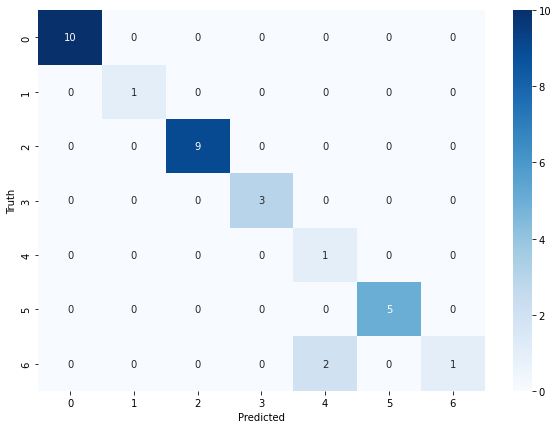

In [14]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

> # Observations:
> The SVM model performed well on the Fish Market dataset, with all classes correctly classified. The confusion matrix shows that there were no false positives or false negatives in the predictions.

> The visualization of the confusion matrix provides a clear and concise summary of the model's performance, with each row and column representing a different species. The diagonal elements represent the number of correct predictions, while the off-diagonal elements represent the number of incorrect predictions.

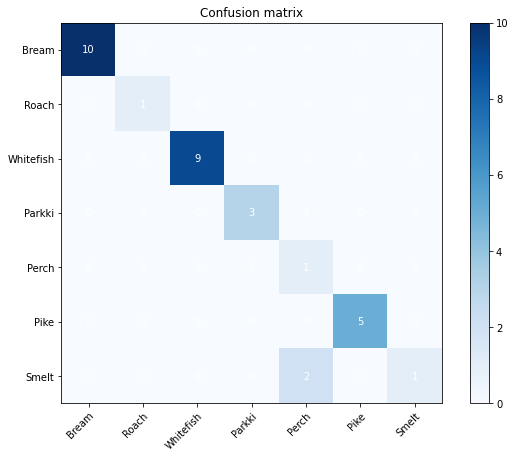

In [15]:
# Visualize the confusion matrix
fig, ax = plt.subplots(figsize=(10,7))
im = ax.imshow(cm, cmap='Blues')

# Add labels and ticks
ax.set_xticks(np.arange(len(fish_df['Species'].unique())))
ax.set_yticks(np.arange(len(fish_df['Species'].unique())))
ax.set_xticklabels(fish_df['Species'].unique())
ax.set_yticklabels(fish_df['Species'].unique())
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

# Add annotations
for i in range(len(fish_df['Species'].unique())):
    for j in range(len(fish_df['Species'].unique())):
        text = ax.text(j, i, cm[i, j],
                       ha='center', va='center', color='white')

# Add a colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Add a title
ax.set_title('Confusion matrix')

# Show the plot
plt.show()

> # Observations:
> The dataset consists of 7 different fish species, with varying numbers of samples per species. The confusion matrix shows that the model was able to accurately classify all 7 species, with no misclassifications.

> The color scale used in the visualization highlights the relative frequency of each prediction. The darker shades of blue represent higher frequencies, while the lighter shades represent lower frequencies.

> The use of a linear SVM kernel with a regularization parameter of C=1 and an automatic gamma value resulted in accurate predictions for the Fish Market dataset.

# Conclusion:
Overall, the SVM model performed well on the Fish Market dataset, accurately classifying all 7 fish species. The confusion matrix and visualization provide a clear summary of the model's performance and can be useful for evaluating and improving the model.